# Week 3 handin

## Ex 1 Classes
1. Create 3 classes: Student, DataSheet and Course
2. A student has a data_sheet and a data_sheet has multiple courses in particular order
3. Each course has name, classroom, teacher, ETCS and optional grade if course is taken.
4. In Student create __init__() so that a Student can be initiated with name, gender, data_sheet and image_url
5. In DataSheet create a method to get_grades_as_list()
6. In student create a method: get_avg_grade()
7. Create a function that can generate n number of students with random: name, gender, courses (from a fixed list of course names), grades, img_url
   1. Let the function write the result to a csv file with format stud_name, course_name, teacher, ects, classroom, grade, img_url
7. Read student data into a list of Students from a csv file: 
   1. loop through the list and print each student with name, img_url and avg_grade.
   2. sort the list by avg_grade
   3. create a bar chart with student_name on x and avg_grade on y-axis
8. Make a method on Student class that can show progression of the study in % (add up ECTS from all passed courses divided by total of 150 total points (equivalent to 5 semesters))
9. Show a bar chart of distribution of study progression on x-axis and number of students in each category on y-axis. (e.g. make 10 categories from 0-100%)

Extra: Make the Datasheet class iterable so that next(data_sheet) will return the next course in the list

## Ex 2 Exceptions (extra)
1. Create a function that can take a list of students and return the 3 students closest to completing their study.
2. If list is shorter than 3 raise your own custom exception (NotEnoughStudentsException)
3. Create another function that can create a csv file with 3 students closest to completion
   1. If an exception is raised write an appropriate message to the file

## Ex 3 Plotting (extra)
1. Create a function that can take a list of students and show a pie chart of how students are distributed in ECTS percentage categories (10%, 20%, ...)
2. create a function that can take a list of students and show how many students have taken each course (bar chart)
   1. create a method on student that can return a list of courses
3. make the figure show males and females in different colors for each course (display 2 datasets in same figure)


## 02 Status
    Exercise 1  completed parts: 1,2,3,4,5,6,7,8,9,extra
    Exercise 2  completed parts: 1,2,3,3A
    Exercise 3  completed parts: 1,2

## 03 Solution part 1




In [1]:
import string

class Student():
    def __init__(self, name, gender, image_url):
        self.name=name
        self.gender=gender
        self.image_url=image_url
        self.data_sheet=DataSheet()
    def __str__(self):
        return '{n} ({g}), img_url: {i},\n{c}'.format(n=self.name, g=self.gender, c=self.data_sheet.__str__(), i=self.image_url)
        
    def get_avg_grade(self):
        grade_list=[]
        for course in self.data_sheet.course_list:
            grade_list.append(course.grade)
            
        grade_sum=0
        for grade in grade_list:
            grade_sum+=grade
        return grade_sum/len(grade_list)
    '''Make a method on Student class that can show progression of the study in % 
(add up ECTS from all passed courses divided by total of 150 total points (equivalent to 5 semesters))'''
    def show_progression(self):
        sum=0
        for c in self.data_sheet.course_list:
            sum+=c.ETCS
        return (int(round((sum/150*100),0)))
    
    
        
        

class DataSheet():
    '''Has multiple coures in particular order'''
    def __init__(self):
        self.course_list=[]
        self.shown_course=0
        
    def __str__(self):
        str='Courses:\n'
        for c in self.course_list:
            str+=c.__str__()+'\n'
        return str

        
    def get_grades_as_list():
        grade_list=[]
        for course in self.course_list:
            if(course.taken==true):
                grade_list.append(course.grade)
        return grade_list

    #    Extra: Make the Datasheet class iterable so that next(data_sheet) will return the next course in the list
    def next(self):
        c=self.course_list[self.shown_course]
        self.shown_course+=1
        if(self.shown_course==len(self.course_list)):
            self.shown_course=0
        return c
    
        
        
class Course():
    def __init__(self,name, classroom, taken=False, teacher='teacher' , ETCS=0):
        self.name=name
        self.classroom=classroom
        self.teacher=teacher
        self.ETCS=ETCS
        self.taken=taken
        self.grade=0
        
    def __repr__(self):
        return 'Course(%r, %r, %r, %r, %r, %r)'%(self.name, self.classroom, self.teacher, self.ETCS, self.taken, self.grade)
    
    def __str__(self):
        return '{n}: classroom: {c}, teacher: {t}, ETCS: {E}, grade: {g}.'.format(n=self.name, c=self.classroom, t=self.teacher,E=self.ETCS, g=self.grade)
    
        


In [2]:
from random import randint
import random

names=[['Mikkel','m'], ['Maria','k'], ['Signe','k'], ['Bo','m'], ['Johan','m'], ['Tom','m'], ['Adam','m'],[ 'Daniel','m'],[ 'Mia','k'], ['Mona','k'],[ 'Caroline','k'],[ 'Klara','k'], ['Sara','k'],['Sebastian','m']]
genders=['k','m']
course_names=['Math', 'Sience', 'Chemistry', 'English', 'Danish', 'IT', 'Sport', 'History']
teachers=['KWO','POL','MAW','AIW','AGD','NDL','OTA','PAA','WER']
grades=[12,10,7,4,2,0,-3]

def link_factory():
    link='http://schoolspics/'
    link+=(''.join(random.choice(string.ascii_lowercase) for i in range(10)))
    link+=('/')+str(randint(100000,1000000))
    return link

def course_factory():
    course_list=[]
    for i in range(0,8):
        course=Course(name=course_names[i], teacher=teachers[i], classroom=random.randint(1,99),ETCS=random.randint(2,5)*5)
        course_list.append(course)
    return course_list

courses=course_factory()
        


In [3]:
import csv
import random
'''Let the function write the result to a csv file with format 
stud_name, course_name, teacher, ects, classroom, grade, img_url, avg_grade.'''
_filename='students.csv'

def write_students_to_csv(student_list,filename):
    with open(filename, 'w',) as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['stud_name', 'course_name', 'teacher', 'etcs', 'classroom', 'grade', 'img_url',])
        for st in student_list:
            for c in st.data_sheet.course_list:
                writer.writerow([st.name, c.name, c.teacher, c.ETCS, c.classroom, c.grade, st.image_url ])


students=[]
def populate_students(n):
    names_clone=names[:]
    
    for i in range(n):
        st_name=random.choice(names_clone)
        s=Student(st_name[0],st_name[1], link_factory())
        names_clone.remove(st_name)
        course_clone=courses[:]

        for c in range(randint(1,len(course_clone))):
            course=random.choice(course_clone)
            course.grade=random.choice(grades)
            course.taken=True
            s.data_sheet.course_list.append(course)
            course_clone.remove(course)
            
        students.append(s)
    write_students_to_csv(students,_filename)
        
    

populate_students(10)
for co in course_factory():
#    print(co.__str__())
    pass

for st in students:
#    print(st.name, ':\n',st.data_sheet.__str__())
#   print(st.get_avg_grade())
    pass
   

In [4]:
'''Read student data into a list of Students from a csv file:
A. loop through the list and print each student with name, img_url and avg_grade.
B. sort the list by avg_grade
C. create a bar chart with student_name on x and avg_grade on y-axis'''
def read_students_from_file(_filename):
    students_ff=[]
    with open(_filename) as f:
        reader = csv.reader(f)
        header_row = next(reader)

        for row in reader:
            #print('Row #' + str(reader.line_num) + ' ' + str(row))
            #print(row[1])
        #,name, classroom, taken=False, teacher='teacher' , ETCS=0):
            course=Course(name=row[1],taken=True,teacher=row[2],ETCS=int(row[3]),classroom=row[4])
            course.grade=int(row[5])
            count=0
            for student in students_ff:#self, name, gender, image_url)
                if(student.name==row[0]):
                    student.data_sheet.course_list.append(course)
                    count+=1
            if(count==0):
                gender='undefined'
                for element in names:
                    if(element[0]==row[0]):
                        gender=element[1]
                new_student=Student(row[0],gender,row[6])
                new_student.data_sheet.course_list.append(course)
                students_ff.append(new_student)
    return students_ff
                
                    
st_list=read_students_from_file(_filename)
for stt in st_list:
#    print(stt.__str__())
    pass
                    
    
def student_get_avg_grade(student):
    return student.get_avg_grade()



st_list.sort(key=student_get_avg_grade)

for stud in st_list:
    print(stud.name, stud.image_url, stud.get_avg_grade())
            
        


    

Signe http://schoolspics/fgicuvapwe/900254 -1.5
Maria http://schoolspics/dbmqaooqge/767980 -0.3333333333333333
Bo http://schoolspics/gxovlohypm/563009 2.5714285714285716
Sara http://schoolspics/kasuetzcem/823798 3.5
Klara http://schoolspics/fhiehhmehx/127532 3.5
Mikkel http://schoolspics/fwnchhvocn/674809 3.7142857142857144
Sebastian http://schoolspics/sdfpsskkkp/456034 3.7142857142857144
Johan http://schoolspics/fcelhewdhk/861015 3.8
Tom http://schoolspics/ecokesbdgu/736024 6.0
Mona http://schoolspics/vgzitipqrt/966612 7.0


<IPython.core.display.Javascript object>


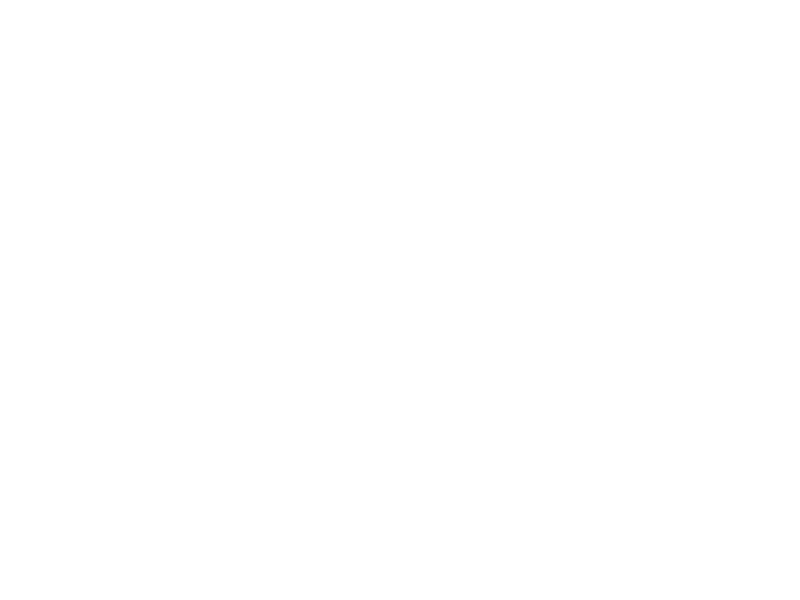

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

In [5]:
%matplotlib notebook
import matplotlib.pyplot as plt


#   3. create a bar chart with student_name on x and avg_grade on y-axis
plt.bar([s.name for s in st_list], [s.get_avg_grade() for s in st_list], width=0.5, align='center') 
plt.title("Avarage grade", fontsize=12)
plt.xlabel("Students", fontsize=10)
plt.ylabel("Grades", fontsize=10)
plt.xticks(rotation=75, horizontalalignment='right',fontweight='light')


<IPython.core.display.Javascript object>


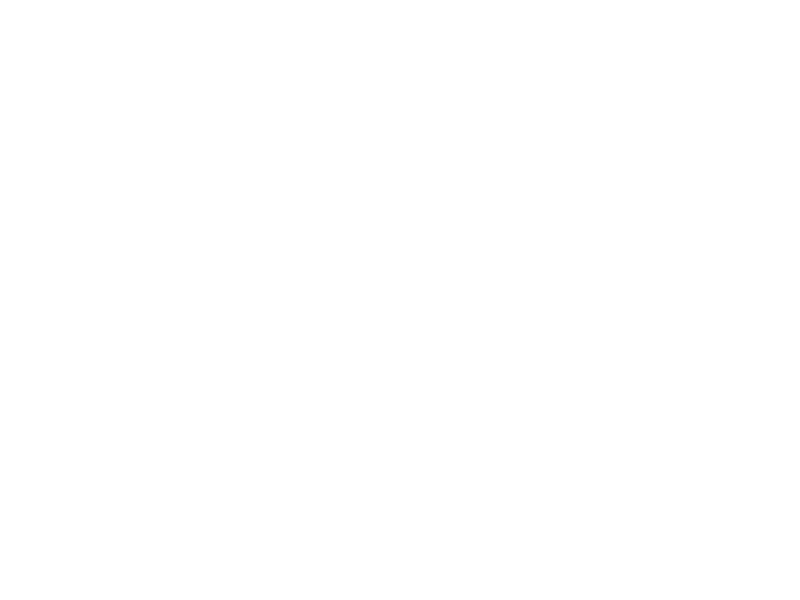

<BarContainer object of 10 artists>

In [6]:

%matplotlib notebook
import matplotlib.pyplot as plt


#   3. create a bar chart with student_name on x and avg_grade on y-axis
plt.title("Study progression", fontsize=12)
plt.xlabel("Students", fontsize=10)
plt.ylabel("progress in %", fontsize=10)
plt.bar([s.name for s in st_list], [s.show_progression() for s in st_list], width=0.5, align='center') 




In [7]:
print(st_list[3].data_sheet.next())
print(st_list[3].data_sheet.next())
print(st_list[3].data_sheet.next())
print(st_list[3].data_sheet.next())
print(st_list[3].data_sheet.next())
print(st_list[3].data_sheet.next())
print(st_list[3].data_sheet.next())
print(st_list[3].data_sheet.next())
print(st_list[3].data_sheet.next())


IT: classroom: 88, teacher: NDL, ETCS: 15, grade: 10.
Danish: classroom: 73, teacher: AGD, ETCS: 20, grade: 2.
Sience: classroom: 51, teacher: POL, ETCS: 25, grade: -3.
Chemistry: classroom: 57, teacher: MAW, ETCS: 20, grade: 0.
Math: classroom: 49, teacher: KWO, ETCS: 10, grade: 10.
Sport: classroom: 79, teacher: OTA, ETCS: 25, grade: 0.
History: classroom: 67, teacher: PAA, ETCS: 25, grade: 7.
English: classroom: 28, teacher: AIW, ETCS: 25, grade: 2.
IT: classroom: 88, teacher: NDL, ETCS: 15, grade: 10.


## 04 Solution part 2


In [8]:
'''Create a function that can take a list of students and return the 3 students closest to completing their study.
If list is shorter than 3 raise your own custom exception (NotEnoughStudentsException)
Create another function that can create a csv file with 3 students closest to completion
If an exception is raised write an appropriate message to the file'''

import csv
class NotEnoughStudentsException(IndexError):
    def __init__(self,msg):
        IndexError.__init__(self,msg)
        
def student_get_progression(student):
    return student.show_progression()

def show_progressions(list):
    if(len(list)<3):
        raise NotEnoughStudentsException("There is not enough students on the given list")
    list.sort(key=student_get_progression, reverse=True )
    return list[0:3]

def write_progressions(list):
    filename='highest_progression.csv'
    try:
        progression_list=show_progressions(list)
        write_students_to_csv(progression_list,filename)
    
    except NotEnoughStudentsException as e:
        with open(filename, 'w',) as csvfile:
            writer = csv.writer(csvfile)
            writer.writerow([e])
        

        
        
write_progressions(st_list)
    


## 05 Solution part 3
1. Create a function that can take a list of students and show a pie chart of how students are distributed in ECTS percentage categories (10%, 20%, ...)
2. create a function that can take a list of students and show how many students have taken each course (bar chart)
   1. create a method on student that can return a list of courses
3. make the figure show males and females in different colors for each course (display 2 datasets in same figure)


{10: 0, 20: 2, 30: 0, 40: 1, 50: 1, 60: 1, 70: 1, 80: 0, 90: 0, 100: 2}


<IPython.core.display.Javascript object>


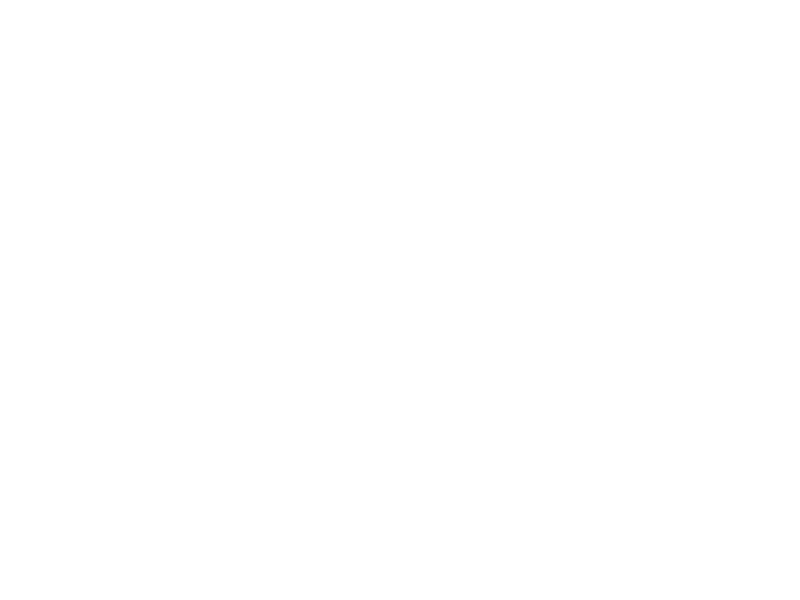

In [9]:
#show_progression:
data={k:0 for k in range(10, 101, 10)}

for st in st_list:
    p=st.show_progression()
    for k in data.keys():
        
        if( p> k-10 and p <= k):
            data[k]+=1
print(data)
# Pie chart
#data = {'apple': 10,'banana':2,'citrus':32,'dragon fruit':8}
explode = (0.1, 0, 0, 0) # offset second slice
fig1, ax1 = plt.subplots() # first returned is the containing figure (fig1), then the subplot Axe object(s) (ax1)
ax1.pie(data.values(), labels=data.keys(), autopct=lambda p:'{:.2f}%({:.0f})'.format(p,(p/100)*sum(data.values())), #explode=explode,
        #autopct=make_autopct(data.values()), 
        #autopct='%.1f', 
        # autopct= a format string like '%1.2f%%' for showing pct sign and 2 decimals
        shadow=True, startangle=90)
ax1.set_aspect('equal')
ax1.legend(data.keys(), loc='upper right') # use instead of labels in ax1.pie(...)
#ax1.axis('equal')  
#plt.tight_layout()
plt.show()

{'IT': 4, 'Danish': 4, 'Sience': 7, 'Chemistry': 7, 'Math': 6, 'Sport': 6, 'History': 7, 'English': 5}


<IPython.core.display.Javascript object>


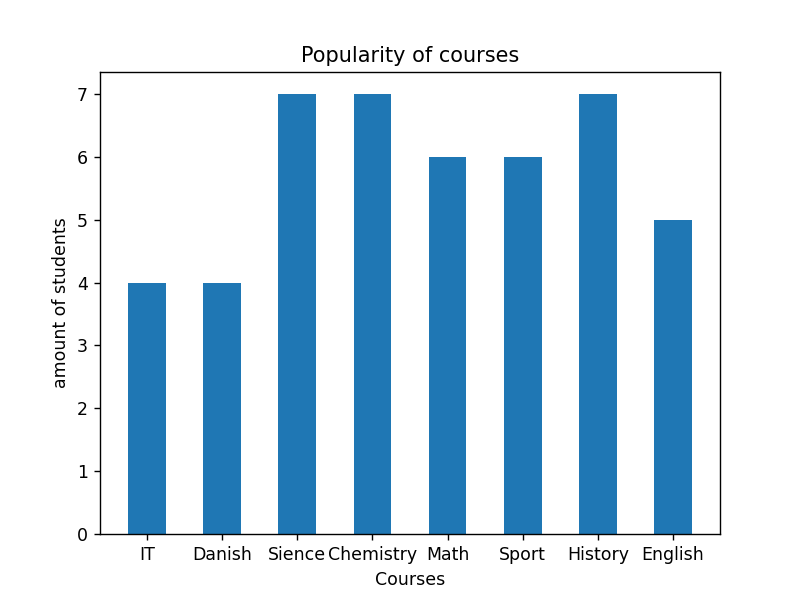

In [10]:
'''create a function that can take a list of students and show how many students have taken each course (bar chart)
create a method on student that can return a list of courses'''

%matplotlib notebook
import matplotlib.pyplot as plt
courses_cummulation=[]
for st in st_list:
    for c in st.data_sheet.course_list:
        courses_cummulation.append(c.name)
#print(courses_cummulation)

taken_courses={}
for c in courses_cummulation:
    taken_courses.setdefault(c,0)
    taken_courses[c]+=1
    
print(taken_courses)

plt.title("Popularity of courses", fontsize=12)
plt.xlabel("Courses", fontsize=10)
plt.ylabel("amount of students", fontsize=10)
plt.bar(taken_courses.keys(),taken_courses.values(), width=0.5, align='center')
#plt.bar([s.name for s in st_list], [s.show_progression() for s in st_list], width=0.5, align='center') 
plt.show()
